# TRADING Stocks Analysis 

## ADANIENT 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import yfinance as yf 

In [2]:
ada = yf.download('ADANIENT.NS', start="2019-01-01", end="2023-12-30")
ada.head()   

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-01,160.899994,162.350006,155.449997,157.250000,155.387482,4726656
2019-01-02,157.000000,157.850006,152.500000,154.850006,153.015915,2735262
2019-01-03,154.899994,156.100006,150.300003,152.500000,150.693741,2758876
2019-01-04,152.100006,154.000000,150.000000,152.550003,150.743134,2777308
2019-01-07,152.899994,154.449997,150.250000,151.250000,149.458527,2714218


In [3]:
ada.info() 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1235 entries, 2019-01-01 to 2023-12-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1235 non-null   float64
 1   High       1235 non-null   float64
 2   Low        1235 non-null   float64
 3   Close      1235 non-null   float64
 4   Adj Close  1235 non-null   float64
 5   Volume     1235 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 67.5 KB


In [4]:
ada.rename(columns={"Adj Close": "price_t"}, inplace=True)
ada.head()

,Open,High,Low,Close,price_t,Volume
Date,,,,,,
2019-01-01,160.899994,162.350006,155.449997,157.250000,155.387482,4726656
2019-01-02,157.000000,157.850006,152.500000,154.850006,153.015915,2735262
2019-01-03,154.899994,156.100006,150.300003,152.500000,150.693741,2758876
2019-01-04,152.100006,154.000000,150.000000,152.550003,150.743134,2777308
2019-01-07,152.899994,154.449997,150.250000,151.250000,149.458527,2714218


In [5]:
ada.describe() 

,Open,High,Low,Close,price_t,Volume
count,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1.235000e+03
mean,1344.034128,1368.917446,1316.093201,1342.267936,1341.025724,4.949321e+06
std,1141.843379,1158.306299,1120.649001,1138.656579,1138.593916,5.420402e+06
min,116.349998,119.500000,113.000000,116.949997,115.564796,0.000000e+00
25%,197.949997,202.500000,194.474998,198.875000,197.636307,1.968960e+06
50%,1420.000000,1445.000000,1386.199951,1418.849976,1417.538940,3.479669e+06
75%,2213.150024,2244.574951,2170.175049,2207.349976,2206.629150,5.659608e+06
max,4175.000000,4190.000000,4066.399902,4165.299805,4163.219727,6.133448e+07


### Calculate daily returns.

In [6]:
ada['daily_returns']=ada["price_t"].pct_change() 
ada     

,Open,High,Low,Close,price_t,Volume,daily_returns
Date,,,,,,,
2019-01-01,160.899994,162.350006,155.449997,157.250000,155.387482,4726656,NaN
2019-01-02,157.000000,157.850006,152.500000,154.850006,153.015915,2735262,-0.015262
2019-01-03,154.899994,156.100006,150.300003,152.500000,150.693741,2758876,-0.015176
2019-01-04,152.100006,154.000000,150.000000,152.550003,150.743134,2777308,0.000328
2019-01-07,152.899994,154.449997,150.250000,151.250000,149.458527,2714218,-0.008522
...,...,...,...,...,...,...,...
2023-12-22,2815.949951,2847.600098,2791.399902,2808.350098,2808.350098,1513956,0.003072
2023-12-26,2817.000000,2893.750000,2800.100098,2865.449951,2865.449951,2048484,0.020332
2023-12-27,2880.699951,2894.800049,2833.600098,2843.350098,2843.350098,1698325,-0.007713


#### Visualize the trend of stock price. 

<Axes: xlabel='Date'>

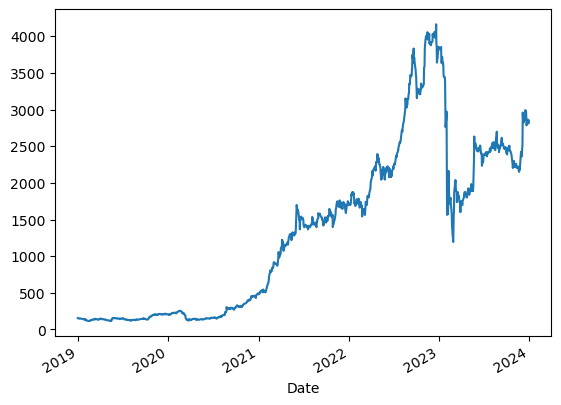

In [7]:
ada['price_t'].plot()

#### Visualize the trend of stock daily returns.

<Axes: xlabel='Date'>

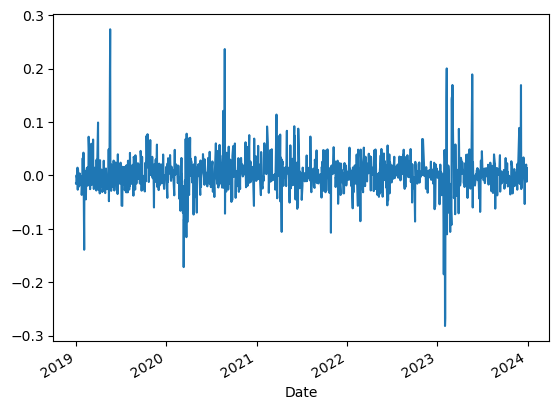

In [8]:
ada['daily_returns'].plot() 

## Moving Average (30 day)

<Axes: xlabel='Date'>

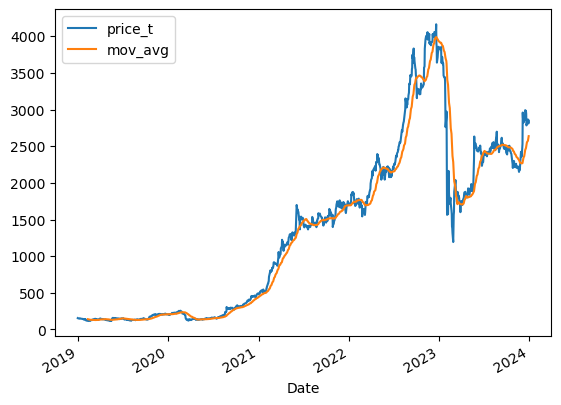

In [9]:
ada['mov_avg']= ada['price_t'].rolling(30).mean() 

ada[[ 'price_t' , 'mov_avg']].plot() 

## Volatility Measures (30 Day)  

<Axes: xlabel='Date'>

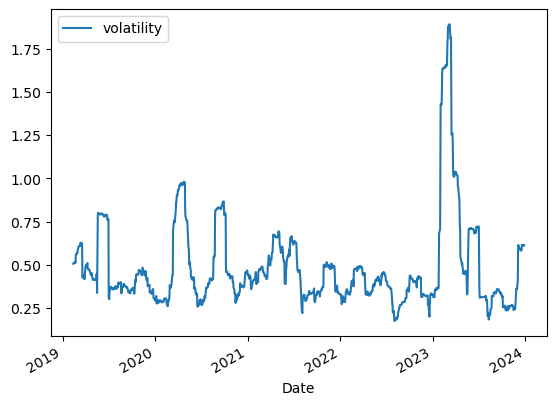

In [10]:
ada['Log_Ret'] = np.log(ada['price_t'] / ada ['price_t'].shift(1))

# compute volatility using the pandas rolling standard deviation function 

ada ['volatility'] = ada ['Log_Ret'].rolling(window=30).std() * np.sqrt(252) 

ada [['volatility']] .plot() 


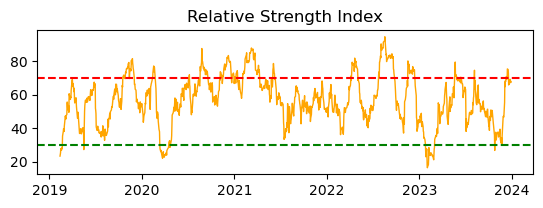

In [11]:
#### RSI (30-day)

change = ada["price_t"].diff()
change.dropna(inplace=True)

# Create two copies of the Closing price Series
change_up = change.copy()
change_down = change.copy()


change_up[change_up<0] = 0
change_down[change_down>0] = 0

# Verify that we did not make any mistakes
change.equals(change_up+change_down)

# Calculate the rolling average of average up and average down
avg_up = change_up.rolling(30).mean()
avg_down = change_down.rolling(30).mean().abs()

rsi = 100 * avg_up / (avg_up + avg_down)

# Create chart on the same figure.
ax = plt.subplot2grid((10,1), (5,0), rowspan = 4, colspan = 1)

# Plot the RSI
ax.set_title('Relative Strength Index')
ax.plot(rsi, color='orange', linewidth=1)

# Add two horizontal lines, signalling the buy and sell ranges.
# Oversold
ax.axhline(30, linestyle='--', linewidth=1.5, color='green')
# Overbought 
ax.axhline(70, linestyle='--', linewidth=1.5, color='red')

## Identify periods of high and low volatility.


[*********************100%%**********************]  1 of 1 completed


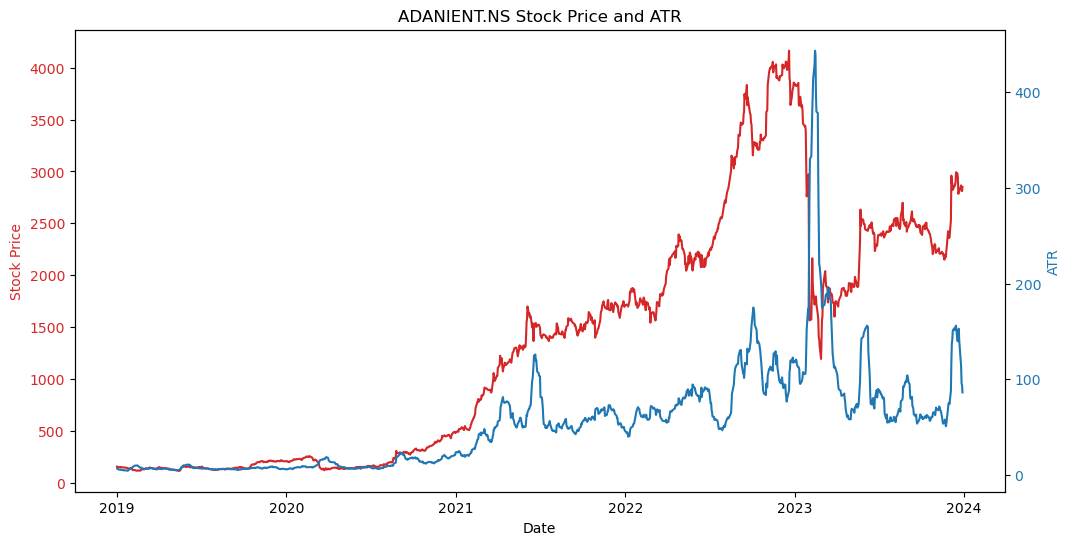

High ATR Periods:
DatetimeIndex(['2021-04-09', '2021-04-12', '2021-04-13', '2021-04-15',
               '2021-04-16', '2021-04-19', '2021-04-20', '2021-04-22',
               '2021-04-23', '2021-06-14',
               ...
               '2023-12-15', '2023-12-18', '2023-12-19', '2023-12-20',
               '2023-12-21', '2023-12-22', '2023-12-26', '2023-12-27',
               '2023-12-28', '2023-12-29'],
              dtype='datetime64[ns]', name='Date', length=309, freq=None)

Low ATR Periods:
DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-07', '2019-01-08', '2019-01-09', '2019-01-10',
               '2019-01-11', '2019-01-14',
               ...
               '2020-07-16', '2020-07-17', '2020-07-20', '2020-07-21',
               '2020-07-22', '2020-07-23', '2020-07-24', '2020-07-27',
               '2020-07-28', '2020-07-29'],
              dtype='datetime64[ns]', name='Date', length=309, freq=None)


In [12]:
# Function to fetch historical stock prices from Yahoo Finance
def get_stock_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data['Adj Close']

# Function to calculate Average True Range (ATR)
def calculate_atr(data, window_size):
    high_low_range = data['High'] - data['Low']
    high_close_range = abs(data['High'] - data['Close'].shift())
    low_close_range = abs(data['Low'] - data['Close'].shift())
    true_range = pd.concat([high_low_range, high_close_range, low_close_range], axis=1).max(axis=1)
    atr = true_range.rolling(window=window_size, min_periods=1).mean()
    return atr

# Define the stock ticker or index
ticker = 'ADANIENT.NS'  # Example: 

# Define the date range for historical data
start_date = '2019-01-01'
end_date = '2023-12-30'

# Fetch stock data
stock_data = yf.download(ticker, start=start_date, end=end_date)

# Set the window size for calculating ATR (adjust as needed)
window_size = 14

# Calculate ATR
atr = calculate_atr(stock_data, window_size)

# Plotting the stock prices and ATR
fig, ax1 = plt.subplots(figsize=(12, 6))

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Stock Price', color=color)
ax1.plot(stock_data.index, stock_data['Adj Close'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('ATR', color=color)
ax2.plot(atr.index, atr, color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title(f'{ticker} Stock Price and ATR')
plt.show()

# Identify periods of high and low ATR
high_atr_periods = atr[atr > atr.quantile(0.75)].index
low_atr_periods = atr[atr < atr.quantile(0.25)].index

print("High ATR Periods:")
print(high_atr_periods)

print("\nLow ATR Periods:")
print(low_atr_periods)

# MMTC  

In [13]:
mtc = yf.download('MMTC.NS', start="2019-01-01", end="2023-12-30")
mtc.head()   

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-01,31.00,31.350000,30.549999,30.900000,30.418442,1990963
2019-01-02,30.85,31.000000,29.900000,30.250000,29.778572,952424
2019-01-03,30.25,30.750000,29.900000,30.049999,29.581688,866287
2019-01-04,30.25,30.250000,29.299999,29.650000,29.187922,646332
2019-01-07,30.00,30.299999,29.500000,29.650000,29.187922,840198


In [14]:
mtc.info()  

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1235 entries, 2019-01-01 to 2023-12-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1235 non-null   float64
 1   High       1235 non-null   float64
 2   Low        1235 non-null   float64
 3   Close      1235 non-null   float64
 4   Adj Close  1235 non-null   float64
 5   Volume     1235 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 67.5 KB


In [15]:
mtc.rename(columns={"Adj Close": "price_t"}, inplace=True)
mtc.head()	


,Open,High,Low,Close,price_t,Volume
Date,,,,,,
2019-01-01,31.00,31.350000,30.549999,30.900000,30.418442,1990963
2019-01-02,30.85,31.000000,29.900000,30.250000,29.778572,952424
2019-01-03,30.25,30.750000,29.900000,30.049999,29.581688,866287
2019-01-04,30.25,30.250000,29.299999,29.650000,29.187922,646332
2019-01-07,30.00,30.299999,29.500000,29.650000,29.187922,840198


In [16]:
mtc.describe() 

,Open,High,Low,Close,price_t,Volume
count,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1.235000e+03
mean,33.608340,34.446316,32.865425,33.532955,33.478314,3.897633e+06
std,13.398243,13.821990,13.081198,13.407527,13.441688,9.690499e+06
min,10.700000,11.050000,9.900000,10.600000,10.600000,0.000000e+00
25%,20.550000,21.250000,20.049999,20.500000,20.363702,7.045360e+05
50%,32.450001,33.000000,32.000000,32.349998,32.349998,1.468824e+06
75%,43.400002,44.625000,42.625000,43.324999,43.324999,3.411304e+06
max,87.199997,89.199997,85.000000,87.099998,87.099998,1.403513e+08


#### Calculate daily returns.

In [17]:
mtc['daily_returns']=mtc["price_t"].pct_change()
mtc 
    

,Open,High,Low,Close,price_t,Volume,daily_returns
Date,,,,,,,
2019-01-01,31.000000,31.350000,30.549999,30.900000,30.418442,1990963,NaN
2019-01-02,30.850000,31.000000,29.900000,30.250000,29.778572,952424,-0.021036
2019-01-03,30.250000,30.750000,29.900000,30.049999,29.581688,866287,-0.006612
2019-01-04,30.250000,30.250000,29.299999,29.650000,29.187922,646332,-0.013311
2019-01-07,30.000000,30.299999,29.500000,29.650000,29.187922,840198,0.000000
...,...,...,...,...,...,...,...
2023-12-22,58.000000,59.549999,57.849998,58.700001,58.700001,3330984,0.014693
2023-12-26,58.950001,61.900002,58.650002,59.750000,59.750000,8894438,0.017888
2023-12-27,60.450001,60.799999,59.150002,60.250000,60.250000,3804923,0.008368


### Visualize the trend of stock price.

<Axes: xlabel='Date'>

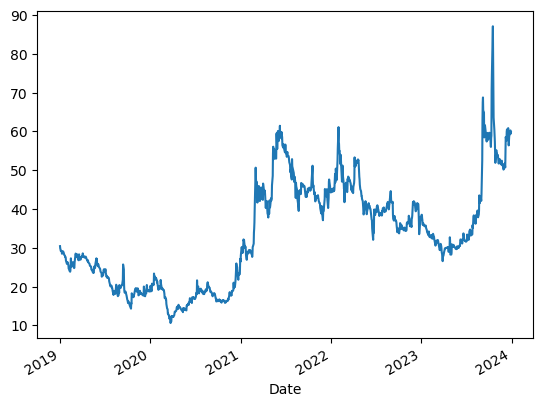

In [18]:
mtc['price_t'].plot()

### Visualize the trend of stock daily returns.

<Axes: xlabel='Date'>

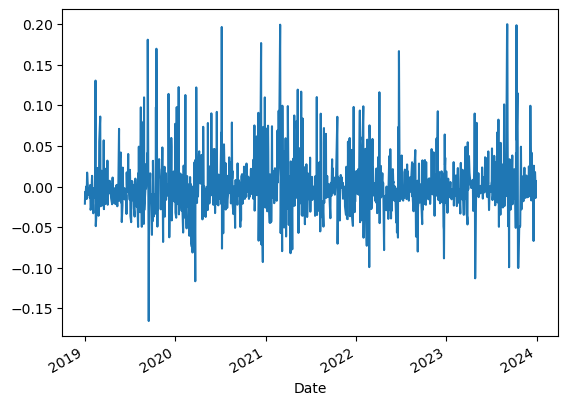

In [19]:
mtc['daily_returns'].plot() 

## Moving Average (30 day)	

<Axes: xlabel='Date'>

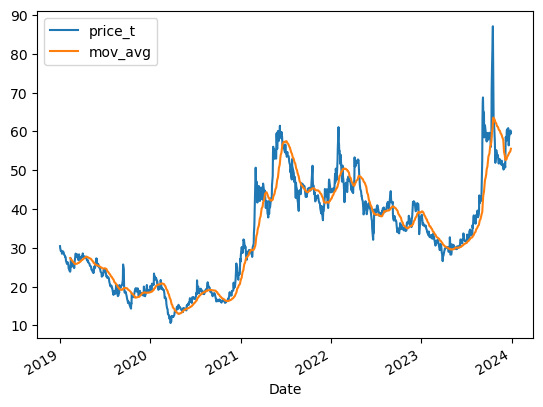

In [20]:
mtc['mov_avg']= mtc['price_t'].rolling(30).mean() 

mtc[[ 'price_t' , 'mov_avg']].plot() 

## Volatility Measures (30 Day)

<Axes: xlabel='Date'>

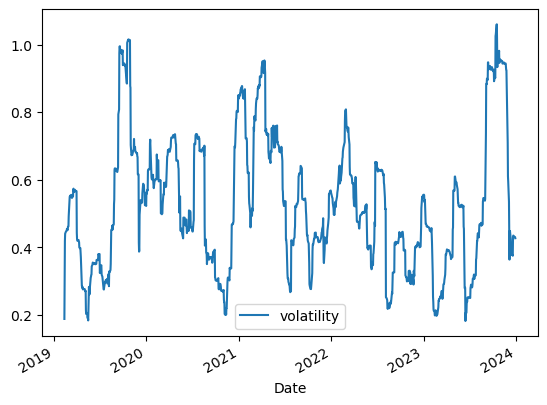

In [21]:
mtc['Log_Ret'] = np.log(mtc['price_t'] / mtc ['price_t'].shift(1))

# compute volatility using the pandas rolling standard deviation function 

mtc ['volatility'] = mtc ['Log_Ret'].rolling(window=30).std() * np.sqrt(252) 

mtc [['volatility']] .plot() 

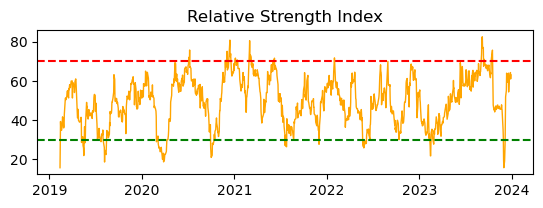

In [22]:
#### RSI (30-day)

change = mtc["price_t"].diff()
change.dropna(inplace=True)

# Create two copies of the Closing price Series
change_up = change.copy()
change_down = change.copy()


change_up[change_up<0] = 0
change_down[change_down>0] = 0

# Verify that we did not make any mistakes
change.equals(change_up+change_down)

# Calculate the rolling average of average up and average down
avg_up = change_up.rolling(30).mean()
avg_down = change_down.rolling(30).mean().abs()

rsi = 100 * avg_up / (avg_up + avg_down)

# Create chart on the same figure.
ax = plt.subplot2grid((10,1), (5,0), rowspan = 4, colspan = 1)

# Plot the RSI
ax.set_title('Relative Strength Index')
ax.plot(rsi, color='orange', linewidth=1)

# Add two horizontal lines, signalling the buy and sell ranges.
# Oversold
ax.axhline(30, linestyle='--', linewidth=1.5, color='green')
# Overbought
ax.axhline(70, linestyle='--', linewidth=1.5, color='red')

## Identify periods of high and low volatility.


[*********************100%%**********************]  1 of 1 completed


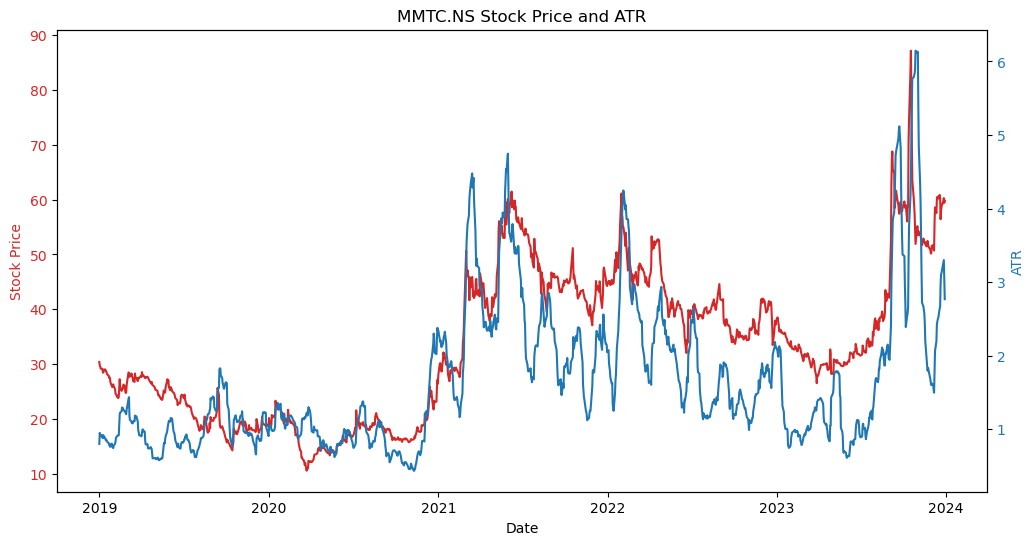

High ATR Periods:
DatetimeIndex(['2020-12-21', '2020-12-22', '2020-12-23', '2020-12-29',
               '2020-12-30', '2020-12-31', '2021-01-01', '2021-01-04',
               '2021-01-05', '2021-01-06',
               ...
               '2023-12-15', '2023-12-18', '2023-12-19', '2023-12-20',
               '2023-12-21', '2023-12-22', '2023-12-26', '2023-12-27',
               '2023-12-28', '2023-12-29'],
              dtype='datetime64[ns]', name='Date', length=309, freq=None)

Low ATR Periods:
DatetimeIndex(['2019-01-01', '2019-01-03', '2019-01-04', '2019-01-07',
               '2019-01-08', '2019-01-09', '2019-01-10', '2019-01-11',
               '2019-01-14', '2019-01-15',
               ...
               '2023-06-14', '2023-06-15', '2023-06-16', '2023-06-19',
               '2023-06-30', '2023-07-03', '2023-07-04', '2023-07-11',
               '2023-07-12', '2023-07-13'],
              dtype='datetime64[ns]', name='Date', length=309, freq=None)


In [23]:
# Function to fetch historical stock prices from Yahoo Finance
def get_stock_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data['Adj Close']

# Function to calculate Average True Range (ATR)
def calculate_atr(data, window_size):
    high_low_range = data['High'] - data['Low']
    high_close_range = abs(data['High'] - data['Close'].shift())
    low_close_range = abs(data['Low'] - data['Close'].shift())
    true_range = pd.concat([high_low_range, high_close_range, low_close_range], axis=1).max(axis=1)
    atr = true_range.rolling(window=window_size, min_periods=1).mean()
    return atr

# Define the stock ticker or index
ticker = 'MMTC.NS'  # Example: 

# Define the date range for historical data
start_date = '2019-01-01'
end_date = '2023-12-30'

# Fetch stock data
stock_data = yf.download(ticker, start=start_date, end=end_date)

# Set the window size for calculating ATR (adjust as needed)
window_size = 14

# Calculate ATR
atr = calculate_atr(stock_data, window_size)

# Plotting the stock prices and ATR
fig, ax1 = plt.subplots(figsize=(12, 6))

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Stock Price', color=color)
ax1.plot(stock_data.index, stock_data['Adj Close'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('ATR', color=color)
ax2.plot(atr.index, atr, color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title(f'{ticker} Stock Price and ATR')
plt.show()

# Identify periods of high and low ATR
high_atr_periods = atr[atr > atr.quantile(0.75)].index
low_atr_periods = atr[atr < atr.quantile(0.25)].index

print("High ATR Periods:")
print(high_atr_periods)

print("\nLow ATR Periods:")
print(low_atr_periods)


# MSTCLTD

#### Calculate daily returns.

In [24]:
mst = yf.download('MSTCLTD.NS', start="2019-01-01", end="2023-12-30")
mst.head()   

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-04-01,114.949997,115.949997,111.000000,111.750000,97.383766,59362
2019-04-02,111.000000,112.000000,108.000000,110.750000,96.512314,60099
2019-04-03,110.000000,110.000000,106.500000,108.050003,94.159424,51210
2019-04-04,106.050003,106.050003,102.699997,103.800003,90.455803,38824
2019-04-05,105.000000,106.550003,102.000000,105.800003,92.198662,30128


In [25]:
mst.info() 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1175 entries, 2019-04-01 to 2023-12-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1175 non-null   float64
 1   High       1175 non-null   float64
 2   Low        1175 non-null   float64
 3   Close      1175 non-null   float64
 4   Adj Close  1175 non-null   float64
 5   Volume     1175 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 64.3 KB


In [26]:
mst.rename(columns={"Adj Close": "price_t"}, inplace=True)
mst.head()

,Open,High,Low,Close,price_t,Volume
Date,,,,,,
2019-04-01,114.949997,115.949997,111.000000,111.750000,97.383766,59362
2019-04-02,111.000000,112.000000,108.000000,110.750000,96.512314,60099
2019-04-03,110.000000,110.000000,106.500000,108.050003,94.159424,51210
2019-04-04,106.050003,106.050003,102.699997,103.800003,90.455803,38824
2019-04-05,105.000000,106.550003,102.000000,105.800003,92.198662,30128


In [27]:
mst.describe() 

,Open,High,Low,Close,price_t,Volume
count,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1.175000e+03
mean,247.661489,254.432128,242.439532,247.323106,229.186706,5.355498e+05
std,109.888829,113.297853,107.981302,110.230358,109.720058,8.639175e+05
min,74.800003,78.000000,73.099998,75.150002,65.488937,0.000000e+00
25%,147.250000,151.949997,143.375000,147.000000,128.908234,1.403865e+05
50%,267.450012,272.500000,261.250000,266.350006,243.016663,2.850870e+05
75%,316.699997,322.899994,310.750000,315.625000,297.793488,5.362670e+05
max,648.799988,689.599976,640.150024,669.200012,669.200012,7.711703e+06


#### Calculate daily returns.

In [28]:
mst['daily_returns']=mst["price_t"].pct_change()
mst  

,Open,High,Low,Close,price_t,Volume,daily_returns
Date,,,,,,,
2019-04-01,114.949997,115.949997,111.000000,111.750000,97.383766,59362,NaN
2019-04-02,111.000000,112.000000,108.000000,110.750000,96.512314,60099,-0.008949
2019-04-03,110.000000,110.000000,106.500000,108.050003,94.159424,51210,-0.024379
2019-04-04,106.050003,106.050003,102.699997,103.800003,90.455803,38824,-0.039334
2019-04-05,105.000000,106.550003,102.000000,105.800003,92.198662,30128,0.019268
...,...,...,...,...,...,...,...
2023-12-22,553.799988,575.000000,547.650024,568.000000,568.000000,2613157,0.039056
2023-12-26,573.000000,670.000000,568.750000,643.450012,643.450012,7711703,0.132835
2023-12-27,648.599976,658.599976,616.200012,620.450012,620.450012,2122797,-0.035745


### Visualize the trend of stock price.

<Axes: xlabel='Date'>

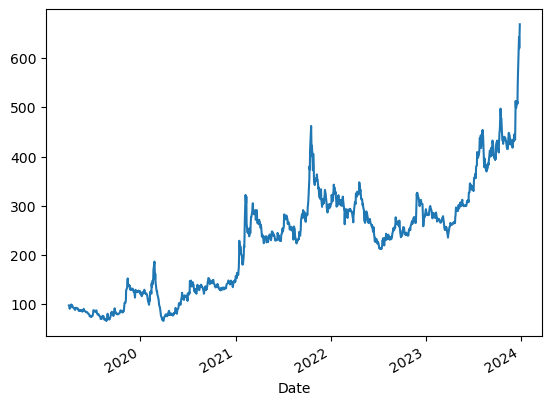

In [29]:
mst['price_t'].plot()

### Visualize the trend of stock daily returns.

<Axes: xlabel='Date'>

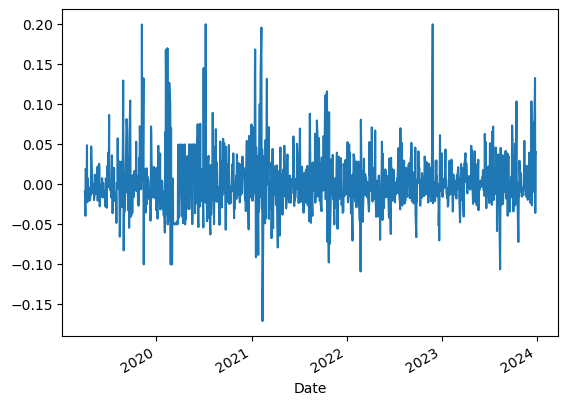

In [30]:
mst['daily_returns'].plot()     

## Moving Average (30 day)	

<Axes: xlabel='Date'>

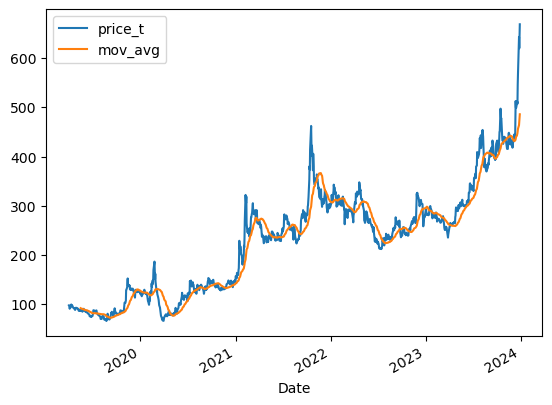

In [31]:
mst['mov_avg']= mst['price_t'].rolling(30).mean() 

mst[[ 'price_t' , 'mov_avg']].plot() 


## Volatility Measures (30 Day)  

<Axes: xlabel='Date'>

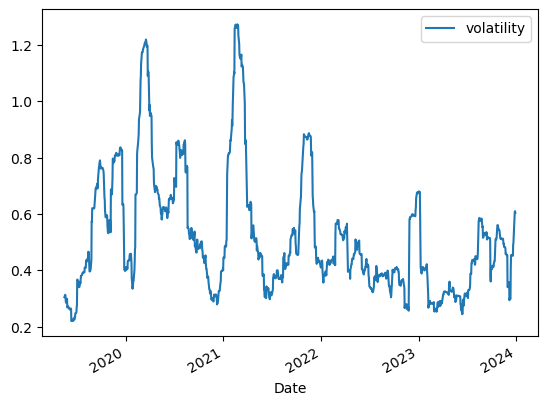

In [32]:
mst['Log_Ret'] = np.log(mst['price_t'] / mst ['price_t'].shift(1))

# compute volatility using the pandas rolling standard deviation function 

mst ['volatility'] = mst ['Log_Ret'].rolling(window=30).std() * np.sqrt(252) 

mst [['volatility']] .plot() 



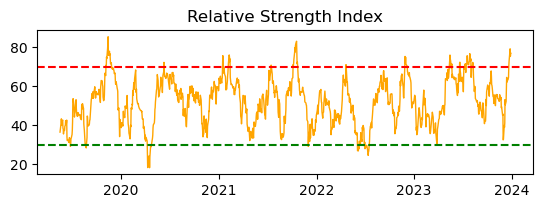

In [33]:
#### RSI (30-day)

change = mst["price_t"].diff()
change.dropna(inplace=True)

# Create two copies of the Closing price Series
change_up = change.copy()
change_down = change.copy()


change_up[change_up<0] = 0
change_down[change_down>0] = 0

# Verify that we did not make any mistakes
change.equals(change_up+change_down)

# Calculate the rolling average of average up and average down
avg_up = change_up.rolling(30).mean()
avg_down = change_down.rolling(30).mean().abs()

rsi = 100 * avg_up / (avg_up + avg_down)

# Create chart on the same figure.
ax = plt.subplot2grid((10,1), (5,0), rowspan = 4, colspan = 1)

# Plot the RSI
ax.set_title('Relative Strength Index')
ax.plot(rsi, color='orange', linewidth=1)

# Add two horizontal lines, signalling the buy and sell ranges.
# Oversold
ax.axhline(30, linestyle='--', linewidth=1.5, color='green')
# Overbought
ax.axhline(70, linestyle='--', linewidth=1.5, color='red')

## Identify periods of high and low volatility.


[*********************100%%**********************]  1 of 1 completed


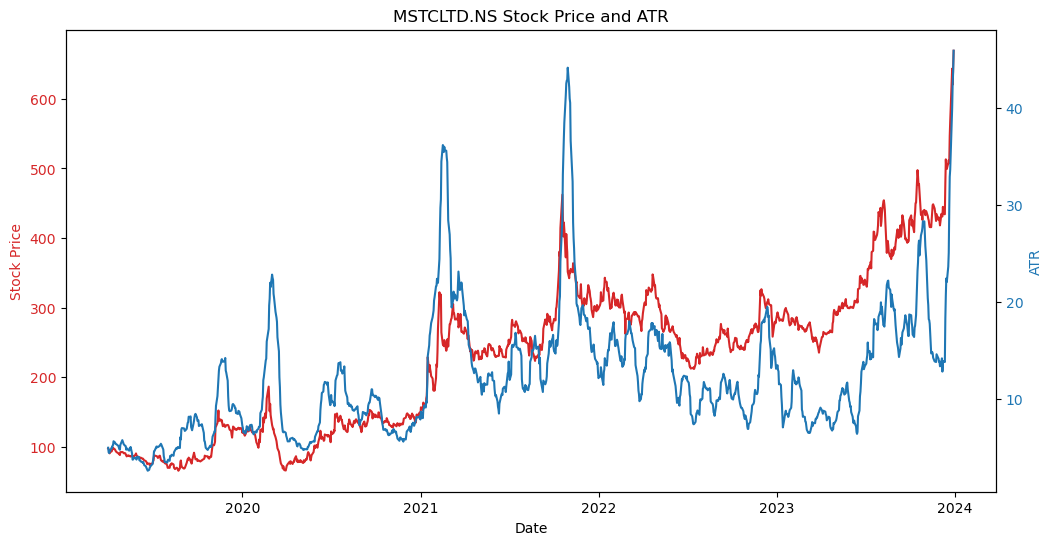

High ATR Periods:
DatetimeIndex(['2020-02-20', '2020-02-24', '2020-02-25', '2020-02-26',
               '2020-02-27', '2020-02-28', '2020-03-02', '2020-03-03',
               '2020-03-04', '2020-03-05',
               ...
               '2023-12-15', '2023-12-18', '2023-12-19', '2023-12-20',
               '2023-12-21', '2023-12-22', '2023-12-26', '2023-12-27',
               '2023-12-28', '2023-12-29'],
              dtype='datetime64[ns]', name='Date', length=294, freq=None)

Low ATR Periods:
DatetimeIndex(['2019-04-01', '2019-04-02', '2019-04-03', '2019-04-04',
               '2019-04-05', '2019-04-08', '2019-04-09', '2019-04-10',
               '2019-04-11', '2019-04-12',
               ...
               '2023-04-25', '2023-04-26', '2023-04-27', '2023-04-28',
               '2023-06-07', '2023-06-09', '2023-06-12', '2023-06-13',
               '2023-06-14', '2023-06-15'],
              dtype='datetime64[ns]', name='Date', length=294, freq=None)


In [34]:
# Function to fetch historical stock prices from Yahoo Finance
def get_stock_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data['Adj Close']

# Function to calculate Average True Range (ATR)
def calculate_atr(data, window_size):
    high_low_range = data['High'] - data['Low']
    high_close_range = abs(data['High'] - data['Close'].shift())
    low_close_range = abs(data['Low'] - data['Close'].shift())
    true_range = pd.concat([high_low_range, high_close_range, low_close_range], axis=1).max(axis=1)
    atr = true_range.rolling(window=window_size, min_periods=1).mean()
    return atr

# Define the stock ticker or index
ticker = 'MSTCLTD.NS'  # Example: 

# Define the date range for historical data
start_date = '2019-01-01'
end_date = '2023-12-30'

# Fetch stock data
stock_data = yf.download(ticker, start=start_date, end=end_date)

# Set the window size for calculating ATR (adjust as needed)
window_size = 14

# Calculate ATR
atr = calculate_atr(stock_data, window_size)

# Plotting the stock prices and ATR
fig, ax1 = plt.subplots(figsize=(12, 6))

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Stock Price', color=color)
ax1.plot(stock_data.index, stock_data['Adj Close'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('ATR', color=color)
ax2.plot(atr.index, atr, color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title(f'{ticker} Stock Price and ATR')
plt.show()

# Identify periods of high and low ATR
high_atr_periods = atr[atr > atr.quantile(0.75)].index
low_atr_periods = atr[atr < atr.quantile(0.25)].index

print("High ATR Periods:")
print(high_atr_periods)

print("\nLow ATR Periods:")
print(low_atr_periods)

# REDINGTON

In [35]:
red = yf.download('REDINGTON.NS', start="2019-01-01", end="2023-12-30")
red.head()   


[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-01,44.049999,44.474998,43.875000,44.275002,35.426521,47228
2019-01-02,44.500000,44.500000,43.500000,43.599998,34.886421,81728
2019-01-03,43.000000,44.174999,43.000000,44.075001,35.266487,3026348
2019-01-04,44.000000,44.150002,43.275002,43.474998,34.786404,143452
2019-01-07,43.299999,43.974998,42.075001,43.049999,34.446346,215860


In [36]:
red.info() 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1235 entries, 2019-01-01 to 2023-12-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1235 non-null   float64
 1   High       1235 non-null   float64
 2   Low        1235 non-null   float64
 3   Close      1235 non-null   float64
 4   Adj Close  1235 non-null   float64
 5   Volume     1235 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 67.5 KB


In [37]:
red.rename(columns={"Adj Close": "price_t"}, inplace=True)
red.head()

,Open,High,Low,Close,price_t,Volume
Date,,,,,,
2019-01-01,44.049999,44.474998,43.875000,44.275002,35.426521,47228
2019-01-02,44.500000,44.500000,43.500000,43.599998,34.886421,81728
2019-01-03,43.000000,44.174999,43.000000,44.075001,35.266487,3026348
2019-01-04,44.000000,44.150002,43.275002,43.474998,34.786404,143452
2019-01-07,43.299999,43.974998,42.075001,43.049999,34.446346,215860


In [38]:
red.describe()  

,Open,High,Low,Close,price_t,Volume
count,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1.235000e+03
mean,109.192996,111.297287,107.036842,108.933603,100.268772,2.121288e+06
std,52.743870,53.401272,51.972604,52.590453,53.116331,3.079928e+06
min,30.000000,32.000000,29.549999,31.150000,26.264835,0.000000e+00
25%,55.712500,57.337500,54.299999,55.625000,46.583323,6.110200e+05
50%,125.000000,128.000000,122.900002,125.500000,115.250443,1.260965e+06
75%,156.825005,159.500000,153.600006,156.025002,148.227280,2.395230e+06
max,200.649994,202.300003,192.750000,199.399994,191.993866,4.319150e+07


#### Calculate daily returns.

In [39]:
red['daily_returns']=red["price_t"].pct_change()
red

,Open,High,Low,Close,price_t,Volume,daily_returns
Date,,,,,,,
2019-01-01,44.049999,44.474998,43.875000,44.275002,35.426521,47228,NaN
2019-01-02,44.500000,44.500000,43.500000,43.599998,34.886421,81728,-0.015246
2019-01-03,43.000000,44.174999,43.000000,44.075001,35.266487,3026348,0.010894
2019-01-04,44.000000,44.150002,43.275002,43.474998,34.786404,143452,-0.013613
2019-01-07,43.299999,43.974998,42.075001,43.049999,34.446346,215860,-0.009776
...,...,...,...,...,...,...,...
2023-12-22,175.899994,181.000000,173.500000,175.800003,175.800003,3592738,-0.000568
2023-12-26,175.000000,178.500000,174.050003,175.699997,175.699997,2078755,-0.000569
2023-12-27,175.699997,177.449997,174.000000,176.000000,176.000000,2608658,0.001707


### Visualize the trend of stock price.

<Axes: xlabel='Date'>

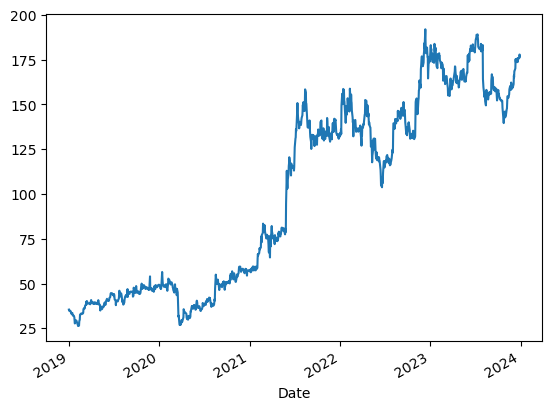

In [40]:
red['price_t'].plot()

### Visualize the trend of stock daily returns.

<Axes: xlabel='Date'>

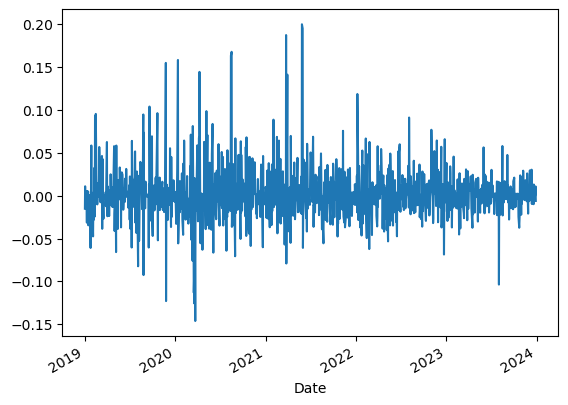

In [41]:
red['daily_returns'].plot() 

## Moving Average (30 day

<Axes: xlabel='Date'>

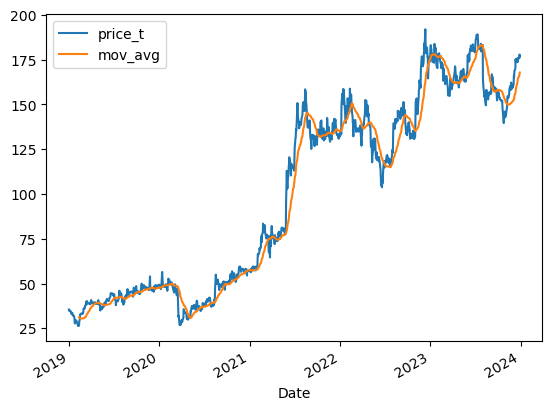

In [42]:
red['mov_avg']= red['price_t'].rolling(30).mean() 

red[[ 'price_t' , 'mov_avg']].plot() 

## Volatility Measures (30 Day)  

<Axes: xlabel='Date'>

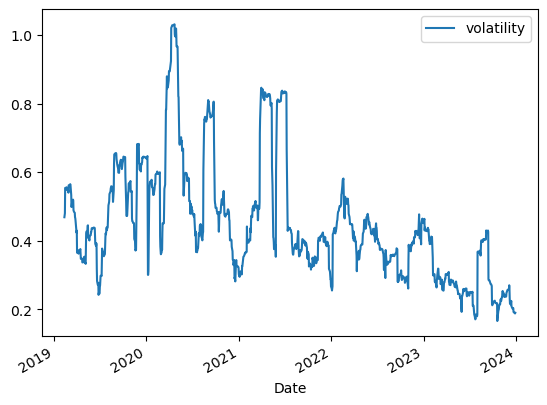

In [43]:
red['Log_Ret'] = np.log(red['price_t'] / red ['price_t'].shift(1))

# compute volatility using the pandas rolling standard deviation function 

red ['volatility'] = red ['Log_Ret'].rolling(window=30).std() * np.sqrt(252) 

red [['volatility']] .plot() 

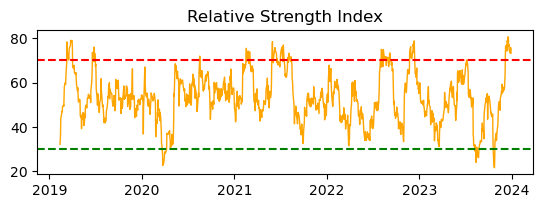

In [44]:
#### RSI (30-day)

change = red["price_t"].diff()
change.dropna(inplace=True)

# Create two copies of the Closing price Series
change_up = change.copy()
change_down = change.copy()


change_up[change_up<0] = 0
change_down[change_down>0] = 0

# Verify that we did not make any mistakes
change.equals(change_up+change_down)

# Calculate the rolling average of average up and average down
avg_up = change_up.rolling(30).mean()
avg_down = change_down.rolling(30).mean().abs()

rsi = 100 * avg_up / (avg_up + avg_down)

# Create chart on the same figure.
ax = plt.subplot2grid((10,1), (5,0), rowspan = 4, colspan = 1)

# Plot the RSI
ax.set_title('Relative Strength Index')
ax.plot(rsi, color='orange', linewidth=1)

# Add two horizontal lines, signalling the buy and sell ranges.
# Oversold
ax.axhline(30, linestyle='--', linewidth=1.5, color='green')
# Overbought
ax.axhline(70, linestyle='--', linewidth=1.5, color='red')

 ## Identify periods of high and low volatility.


[*********************100%%**********************]  1 of 1 completed


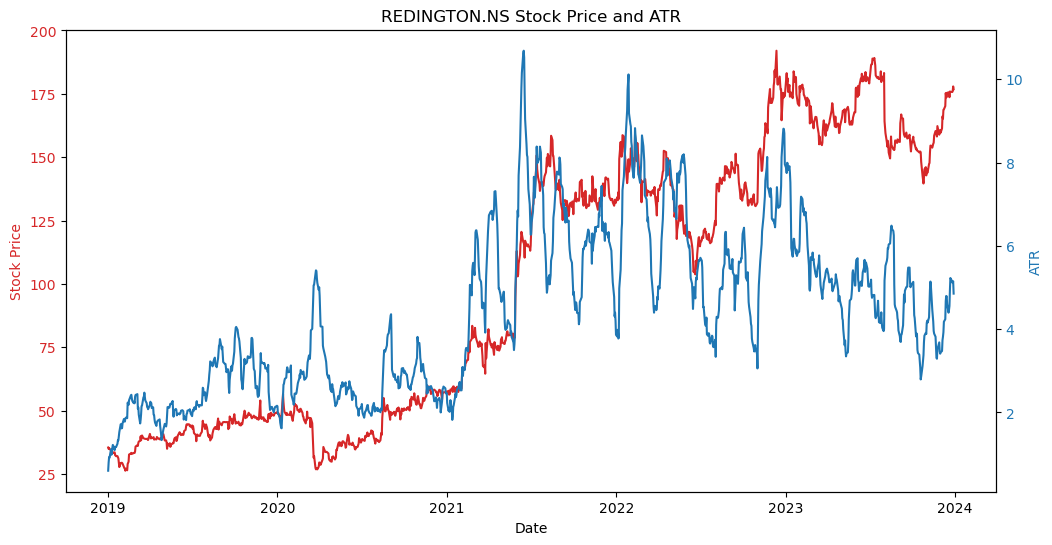

High ATR Periods:
DatetimeIndex(['2021-03-02', '2021-03-03', '2021-03-04', '2021-03-05',
               '2021-03-08', '2021-03-09', '2021-03-30', '2021-03-31',
               '2021-04-01', '2021-04-05',
               ...
               '2023-02-28', '2023-08-09', '2023-08-10', '2023-08-11',
               '2023-08-14', '2023-08-16', '2023-08-17', '2023-08-18',
               '2023-08-21', '2023-08-22'],
              dtype='datetime64[ns]', name='Date', length=309, freq=None)

Low ATR Periods:
DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-07', '2019-01-08', '2019-01-09', '2019-01-10',
               '2019-01-11', '2019-01-14',
               ...
               '2021-01-14', '2021-01-15', '2021-01-18', '2021-01-19',
               '2021-01-20', '2021-01-21', '2021-01-22', '2021-01-25',
               '2021-01-29', '2021-02-01'],
              dtype='datetime64[ns]', name='Date', length=309, freq=None)


In [45]:
# Function to fetch historical stock prices from Yahoo Finance
def get_stock_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data['Adj Close']

# Function to calculate Average True Range (ATR)
def calculate_atr(data, window_size):
    high_low_range = data['High'] - data['Low']
    high_close_range = abs(data['High'] - data['Close'].shift())
    low_close_range = abs(data['Low'] - data['Close'].shift())
    true_range = pd.concat([high_low_range, high_close_range, low_close_range], axis=1).max(axis=1)
    atr = true_range.rolling(window=window_size, min_periods=1).mean()
    return atr

# Define the stock ticker or index
ticker = 'REDINGTON.NS'  # Example: 

# Define the date range for historical data
start_date = '2019-01-01'
end_date = '2023-12-30'

# Fetch stock data
stock_data = yf.download(ticker, start=start_date, end=end_date)

# Set the window size for calculating ATR (adjust as needed)
window_size = 14

# Calculate ATR
atr = calculate_atr(stock_data, window_size)

# Plotting the stock prices and ATR
fig, ax1 = plt.subplots(figsize=(12, 6))

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Stock Price', color=color)
ax1.plot(stock_data.index, stock_data['Adj Close'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('ATR', color=color)
ax2.plot(atr.index, atr, color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title(f'{ticker} Stock Price and ATR')
plt.show()

# Identify periods of high and low ATR
high_atr_periods = atr[atr > atr.quantile(0.75)].index
low_atr_periods = atr[atr < atr.quantile(0.25)].index

print("High ATR Periods:")
print(high_atr_periods)

print("\nLow ATR Periods:")
print(low_atr_periods)

# SUNDRMFAST

In [46]:
sun = yf.download('SUNDRMFAST.NS', start="2019-01-01", end="2023-12-30")
sun.head()   


[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-01,535.000000,546.650024,530.650024,544.599976,524.390076,74793
2019-01-02,543.000000,549.000000,532.150024,533.900024,514.087280,45227
2019-01-03,535.900024,538.150024,525.200012,526.299988,506.769226,24727
2019-01-04,521.549988,535.000000,521.549988,529.950012,510.283875,36929
2019-01-07,533.000000,535.450012,522.700012,525.500000,505.998901,51108


In [47]:
sun.info() 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1234 entries, 2019-01-01 to 2023-12-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1234 non-null   float64
 1   High       1234 non-null   float64
 2   Low        1234 non-null   float64
 3   Close      1234 non-null   float64
 4   Adj Close  1234 non-null   float64
 5   Volume     1234 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 67.5 KB


In [48]:
sun.rename(columns={"Adj Close": "price_t"}, inplace=True)
sun.head()

,Open,High,Low,Close,price_t,Volume
Date,,,,,,
2019-01-01,535.000000,546.650024,530.650024,544.599976,524.390076,74793
2019-01-02,543.000000,549.000000,532.150024,533.900024,514.087280,45227
2019-01-03,535.900024,538.150024,525.200012,526.299988,506.769226,24727
2019-01-04,521.549988,535.000000,521.549988,529.950012,510.283875,36929
2019-01-07,533.000000,535.450012,522.700012,525.500000,505.998901,51108


In [49]:
sun.describe() 

,Open,High,Low,Close,price_t,Volume
count,1234.000000,1234.000000,1234.000000,1234.000000,1234.000000,1.234000e+03
mean,733.411142,745.913453,721.182901,732.645623,723.033225,1.119108e+05
std,275.812115,278.813937,272.196869,275.409781,278.466625,1.263156e+05
min,250.000000,258.250000,248.500000,250.850006,245.358322,1.085700e+04
25%,487.012497,497.387489,476.474991,487.574997,473.678146,4.406725e+04
50%,750.000000,769.625000,735.799988,746.649994,738.439270,7.050550e+04
75%,918.000000,933.937515,905.799988,915.325012,908.063614,1.228128e+05
max,1313.400024,1340.699951,1290.099976,1316.849976,1314.021362,1.322571e+06


### Calculate daily returns.

In [50]:
sun['daily_returns']=sun["price_t"].pct_change()
sun    

,Open,High,Low,Close,price_t,Volume,daily_returns
Date,,,,,,,
2019-01-01,535.000000,546.650024,530.650024,544.599976,524.390076,74793,NaN
2019-01-02,543.000000,549.000000,532.150024,533.900024,514.087280,45227,-0.019647
2019-01-03,535.900024,538.150024,525.200012,526.299988,506.769226,24727,-0.014235
2019-01-04,521.549988,535.000000,521.549988,529.950012,510.283875,36929,0.006935
2019-01-07,533.000000,535.450012,522.700012,525.500000,505.998901,51108,-0.008397
...,...,...,...,...,...,...,...
2023-12-22,1237.300049,1267.750000,1236.050049,1259.550049,1259.550049,171961,0.017983
2023-12-26,1252.000000,1276.000000,1226.250000,1244.250000,1244.250000,97419,-0.012147
2023-12-27,1243.900024,1250.000000,1223.000000,1245.150024,1245.150024,164895,0.000723


### Visualize the trend of stock price.

<Axes: xlabel='Date'>

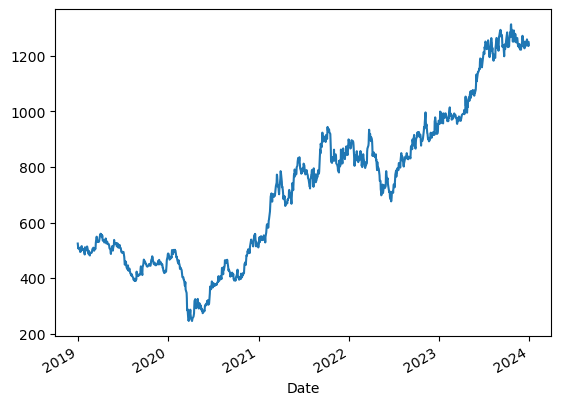

In [51]:
sun['price_t'].plot()


#### Visualize the trend of stock daily returns.

<Axes: xlabel='Date'>

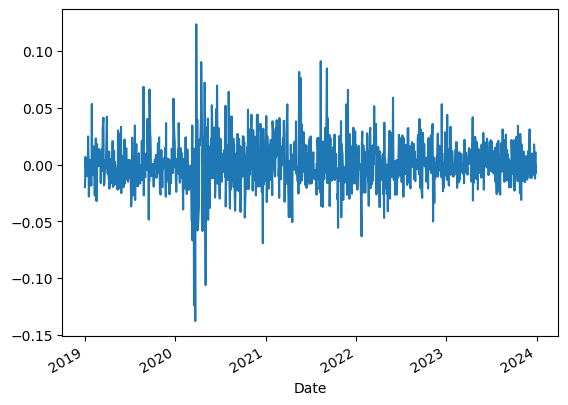

In [52]:
sun['daily_returns'].plot() 

## Moving Average (30 day)

<Axes: xlabel='Date'>

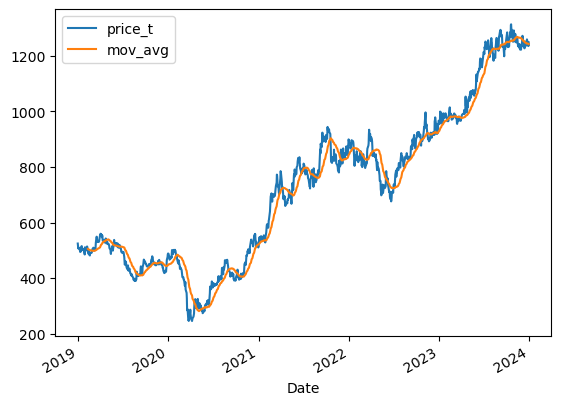

In [53]:
sun['mov_avg']= sun['price_t'].rolling(30).mean() 

sun[[ 'price_t' , 'mov_avg']].plot() 

## Volatility Measures (30 Day)  

<Axes: xlabel='Date'>

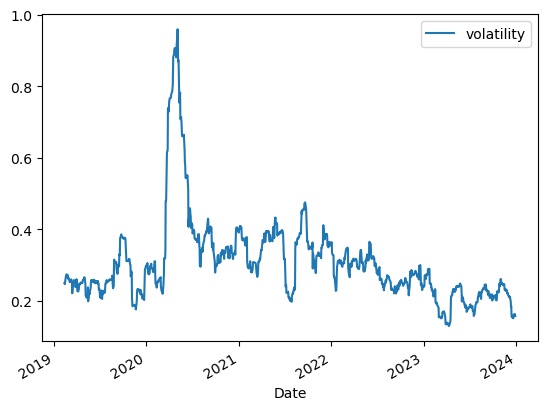

In [54]:

sun['Log_Ret'] = np.log(sun['price_t'] / sun ['price_t'].shift(1))

# compute volatility using the pandas rolling standard deviation function 

sun ['volatility'] = sun ['Log_Ret'].rolling(window=30).std() * np.sqrt(252) 

sun [['volatility']] .plot() 

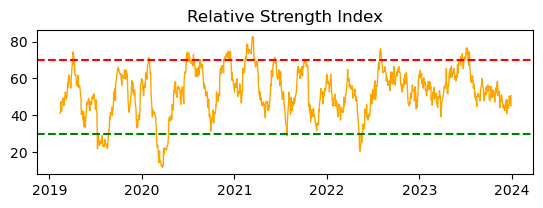

In [55]:
#### RSI (30-day)

change = sun["price_t"].diff()
change.dropna(inplace=True)

# Create two copies of the Closing price Series
change_up = change.copy()
change_down = change.copy()


change_up[change_up<0] = 0
change_down[change_down>0] = 0

# Verify that we did not make any mistakes
change.equals(change_up+change_down)

# Calculate the rolling average of average up and average down
avg_up = change_up.rolling(30).mean()
avg_down = change_down.rolling(30).mean().abs()

rsi = 100 * avg_up / (avg_up + avg_down)

# Create chart on the same figure.
ax = plt.subplot2grid((10,1), (5,0), rowspan = 4, colspan = 1)

# Plot the RSI
ax.set_title('Relative Strength Index')
ax.plot(rsi, color='orange', linewidth=1)

# Add two horizontal lines, signalling the buy and sell ranges.
# Oversold
ax.axhline(30, linestyle='--', linewidth=1.5, color='green')
# Overbought
ax.axhline(70, linestyle='--', linewidth=1.5, color='red')


## Identify periods of high and low volatility.


[*********************100%%**********************]  1 of 1 completed


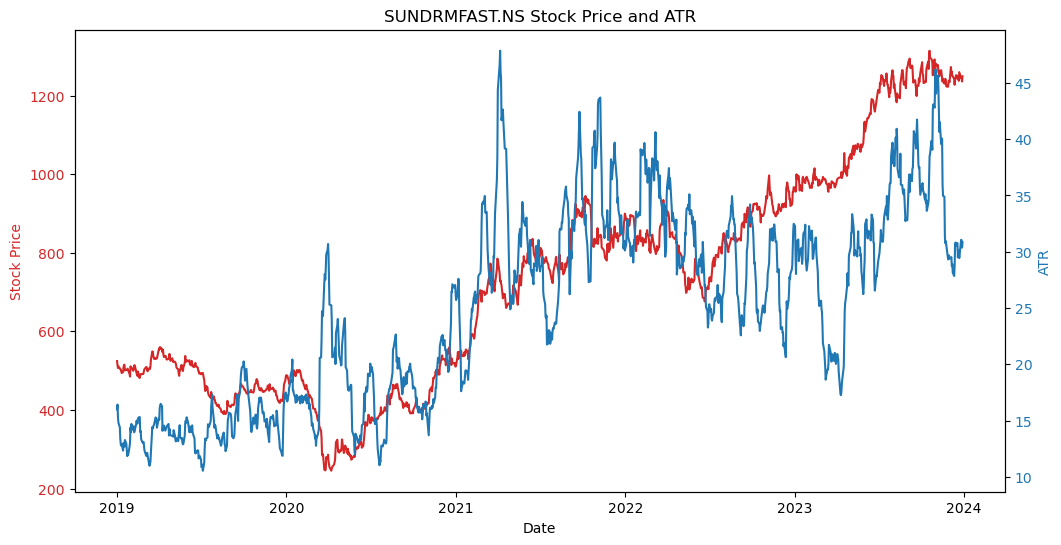

High ATR Periods:
DatetimeIndex(['2021-02-25', '2021-02-26', '2021-03-01', '2021-03-02',
               '2021-03-03', '2021-03-04', '2021-03-05', '2021-03-08',
               '2021-03-09', '2021-03-26',
               ...
               '2023-11-06', '2023-11-07', '2023-11-08', '2023-11-09',
               '2023-11-10', '2023-11-13', '2023-11-15', '2023-11-16',
               '2023-11-17', '2023-11-20'],
              dtype='datetime64[ns]', name='Date', length=309, freq=None)

Low ATR Periods:
DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-07', '2019-01-08', '2019-01-09', '2019-01-10',
               '2019-01-11', '2019-01-14',
               ...
               '2020-11-02', '2020-11-03', '2020-11-04', '2020-11-05',
               '2020-11-06', '2020-11-09', '2020-11-10', '2020-11-11',
               '2020-11-12', '2020-11-14'],
              dtype='datetime64[ns]', name='Date', length=309, freq=None)


In [56]:

# Function to fetch historical stock prices from Yahoo Finance
def get_stock_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data['Adj Close']

# Function to calculate Average True Range (ATR)
def calculate_atr(data, window_size):
    high_low_range = data['High'] - data['Low']
    high_close_range = abs(data['High'] - data['Close'].shift())
    low_close_range = abs(data['Low'] - data['Close'].shift())
    true_range = pd.concat([high_low_range, high_close_range, low_close_range], axis=1).max(axis=1)
    atr = true_range.rolling(window=window_size, min_periods=1).mean()
    return atr

# Define the stock ticker or index
ticker = 'SUNDRMFAST.NS'  # Example: 

# Define the date range for historical data
start_date = '2019-01-01'
end_date = '2023-12-30'

# Fetch stock data
stock_data = yf.download(ticker, start=start_date, end=end_date)

# Set the window size for calculating ATR (adjust as needed)
window_size = 14

# Calculate ATR
atr = calculate_atr(stock_data, window_size)

# Plotting the stock prices and ATR
fig, ax1 = plt.subplots(figsize=(12, 6))

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Stock Price', color=color)
ax1.plot(stock_data.index, stock_data['Adj Close'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('ATR', color=color)
ax2.plot(atr.index, atr, color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title(f'{ticker} Stock Price and ATR')
plt.show()

# Identify periods of high and low ATR
high_atr_periods = atr[atr > atr.quantile(0.75)].index
low_atr_periods = atr[atr < atr.quantile(0.25)].index

print("High ATR Periods:")
print(high_atr_periods)

print("\nLow ATR Periods:")
print(low_atr_periods)

## Correlation Matrix Between Stocks and Indices.

In [57]:
tkr = ['ADANIENT.NS','MMTC.NS','MSTCLTD.NS','REDINGTON.NS','SUNDRMFAST.NS','^NSEI','^NSEBANK']
trading = yf.download(tkr, start="2019-01-01", end="2023-12-30",group_by='tkr') 

[*********************100%%**********************]  7 of 7 completed


In [58]:
close_prices = pd.DataFrame()
for i in tkr:
    close_prices[i] = trading[i]['Adj Close'] 

## compute the correlation matrix

In [59]:
corr_matrix = close_prices.corr()
corr_matrix

,ADANIENT.NS,MMTC.NS,MSTCLTD.NS,REDINGTON.NS,SUNDRMFAST.NS,^NSEI,^NSEBANK
ADANIENT.NS,1.000000,0.651209,0.756858,0.895147,0.826020,0.876894,0.828641
MMTC.NS,0.651209,1.000000,0.817793,0.706980,0.761019,0.791517,0.710074
MSTCLTD.NS,0.756858,0.817793,1.000000,0.863020,0.917426,0.931539,0.848946
REDINGTON.NS,0.895147,0.706980,0.863020,1.000000,0.922216,0.954391,0.899308
SUNDRMFAST.NS,0.826020,0.761019,0.917426,0.922216,1.000000,0.959145,0.942591
^NSEI,0.876894,0.791517,0.931539,0.954391,0.959145,1.000000,0.951029
^NSEBANK,0.828641,0.710074,0.848946,0.899308,0.942591,0.951029,1.000000


## create a heatmap of the correlation matrix using Seaborn

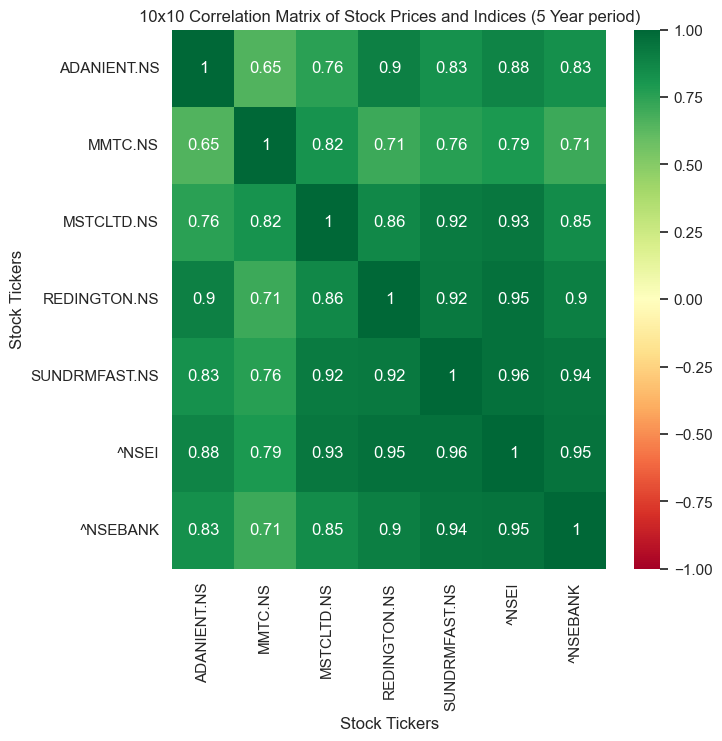

In [60]:

sn.set(style='white')
fig, ax = plt.subplots(figsize=(7, 7))
sn.heatmap(corr_matrix, annot=True, cmap='RdYlGn', vmin=-1, vmax=1, ax=ax)# set the axis labels and title
ax.set_xlabel('Stock Tickers')
ax.set_ylabel('Stock Tickers')
ax.set_title('10x10 Correlation Matrix of Stock Prices and Indices (5 Year period)')

# display the plot
plt.show()

### Sector-wise Analysis

In [63]:
# Define the list of stock tickers
tickers = ['KPRMILL.NS', 'LAXMIMACH.NS', 'PAGEIND.NS', 'TRIDENT.NS', 'WELSPUNIND.NS']


# Function to fetch historical stock price data
def get_stock_data(tickers):
    data = pd.DataFrame() 
    for ticker in tickers:
        try:
            stock_data = yf.download(ticker, start='2019-01-01', end='2023-12-30')['Adj Close']
            data[ticker] = stock_data
        except Exception as e:
            print(f"Error fetching data for {ticker}: {e}")
    return data

# Get historical stock price data for each stocks
data = get_stock_data(tickers)

# Check the retrieved data
print("Data:")
print(data.head())

# Continue with the rest of the analysis...

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
Data:
            KPRMILL.NS  LAXMIMACH.NS    PAGEIND.NS  TRIDENT.NS  WELSPUNIND.NS
Date                                                                         
2019-01-01  109.892433   5596.934082  23833.343750    5.939980      57.771793
2019-01-02  108.931282   5552.002930  23587.744141    5.874656      58.583466
2019-01-03  109.156868   5529.366699  22650.556641    5.861592      58.440231
2019-01-04  107.156136   5545.687500  21738.265625    5.813689      58.106010
2019-01-07  105.645805   5547.921875  21013.642578    5.857237      58.535717


In [64]:
# Define a list of stock tickers representing each sector
tickers = ['KPRMILL.NS', 'LAXMIMACH.NS', 'PAGEIND.NS', 'TRIDENT.NS', 'WELSPUNIND.NS']


# Function to fetch historical stock price data
def get_stock_data(tickers):
    data = pd.DataFrame()
    for ticker in tickers:
        try:
            stock_data = yf.download(ticker, start='2019-01-01', end='2023-12-31')['Adj Close']
            data[ticker] = stock_data
        except Exception as e:
            print(f"Error fetching data for {ticker}: {e}")
    return data

# Get historical stock price data for each sector
data = get_stock_data(tickers)

# Calculate cumulative returns for each sector
cumulative_returns = (1 + data.pct_change()).cumprod()


# Calculate overall cumulative returns for each sector
overall_returns = cumulative_returns.iloc[-1, :]


# Identify leaders and laggards
leader = overall_returns.idxmax()
laggard = overall_returns.idxmin()


# Print results
print(f"Sector - Leader: {leader}, Laggard: {laggard}")

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
Sector - Leader: KPRMILL.NS, Laggard: PAGEIND.NS


### Time Series Analysis

### Trend Analysis

### KPRMILL

[*********************100%%**********************]  1 of 1 completed


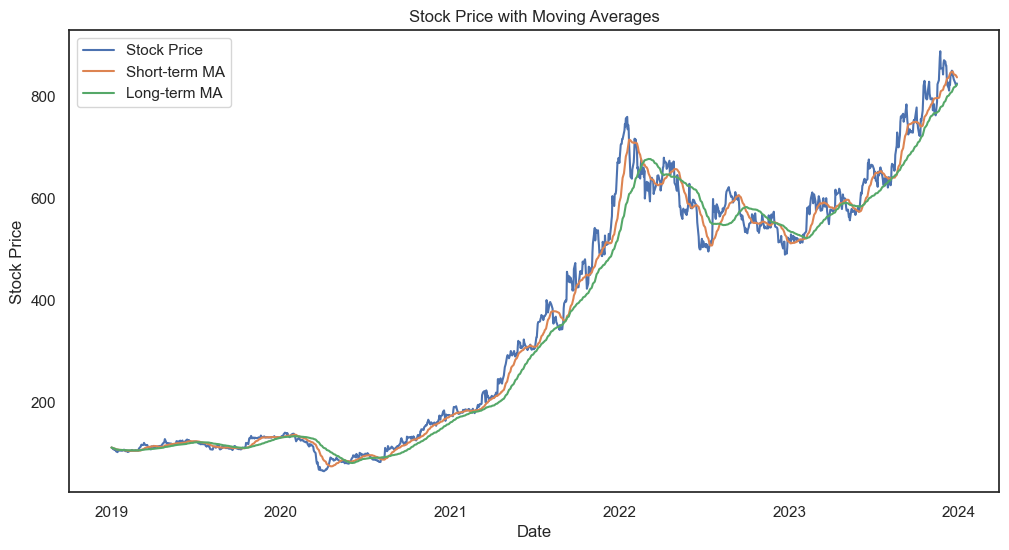

In [65]:
# Function to fetch historical stock prices from Yahoo Finance
def get_stock_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data

# Function to calculate moving averages
def calculate_moving_averages(data, short_window, long_window):
    data['Short_MA'] = data['Close'].rolling(window=short_window, min_periods=1).mean()
    data['Long_MA'] = data['Close'].rolling(window=long_window, min_periods=1).mean()
    return data

# Function to plot stock prices and moving averages
def plot_stock_data(data):
    plt.figure(figsize=(12, 6))
    plt.plot(data['Close'], label='Stock Price')
    plt.plot(data['Short_MA'], label='Short-term MA')
    plt.plot(data['Long_MA'], label='Long-term MA')

    plt.title('Stock Price with Moving Averages')
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.show()

# Define the stock symbol and date range
ticker_symbol = 'KPRMILL.NS'
start_date = '2019-01-01'
end_date = '2023-12-30'

# Fetch historical stock prices
stock_data = get_stock_data(ticker_symbol, start_date, end_date)

# Define the short and long windows for moving averages
short_window = 20
long_window = 50

# Calculate moving averages
stock_data = calculate_moving_averages(stock_data, short_window, long_window)

# Plot the stock prices and moving averages
plot_stock_data(stock_data)

### LAXMIMACH

[*********************100%%**********************]  1 of 1 completed


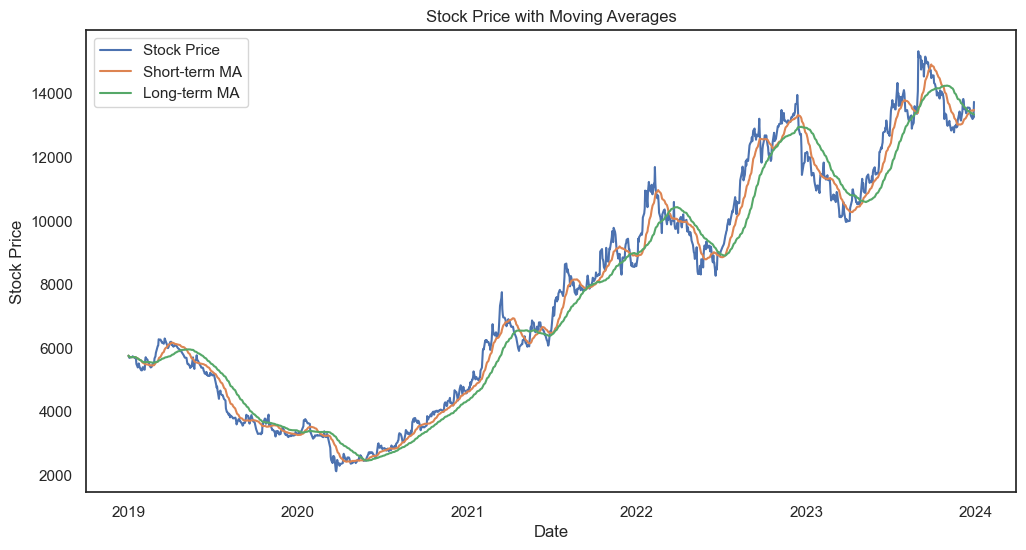

In [66]:
# Function to fetch historical stock prices from Yahoo Finance
def get_stock_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data

# Function to calculate moving averages
def calculate_moving_averages(data, short_window, long_window):
    data['Short_MA'] = data['Close'].rolling(window=short_window, min_periods=1).mean()
    data['Long_MA'] = data['Close'].rolling(window=long_window, min_periods=1).mean()
    return data

# Function to plot stock prices and moving averages
def plot_stock_data(data):
    plt.figure(figsize=(12, 6))
    plt.plot(data['Close'], label='Stock Price')
    plt.plot(data['Short_MA'], label='Short-term MA')
    plt.plot(data['Long_MA'], label='Long-term MA')

    plt.title('Stock Price with Moving Averages')
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.show()

# Define the stock symbol and date range
ticker_symbol = 'LAXMIMACH.NS'
start_date = '2019-01-01'
end_date = '2023-12-30'

# Fetch historical stock prices
stock_data = get_stock_data(ticker_symbol, start_date, end_date)

# Define the short and long windows for moving averages
short_window = 20
long_window = 50

# Calculate moving averages
stock_data = calculate_moving_averages(stock_data, short_window, long_window)

# Plot the stock prices and moving averages
plot_stock_data(stock_data)

### PAGEIND

[*********************100%%**********************]  1 of 1 completed


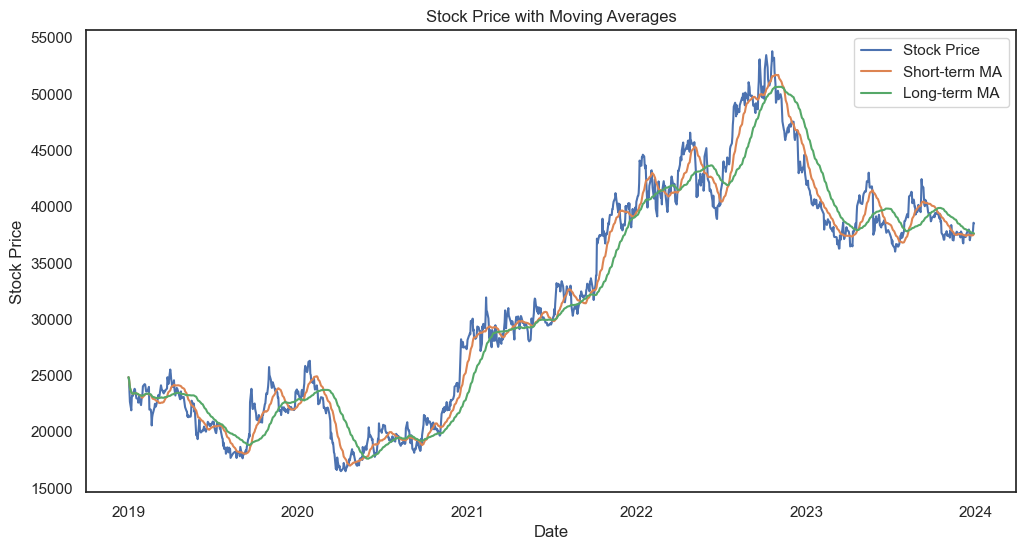

In [67]:
# Function to fetch historical stock prices from Yahoo Finance
def get_stock_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data

# Function to calculate moving averages
def calculate_moving_averages(data, short_window, long_window):
    data['Short_MA'] = data['Close'].rolling(window=short_window, min_periods=1).mean()
    data['Long_MA'] = data['Close'].rolling(window=long_window, min_periods=1).mean()
    return data

# Function to plot stock prices and moving averages
def plot_stock_data(data):
    plt.figure(figsize=(12, 6))
    plt.plot(data['Close'], label='Stock Price')
    plt.plot(data['Short_MA'], label='Short-term MA')
    plt.plot(data['Long_MA'], label='Long-term MA')

    plt.title('Stock Price with Moving Averages')
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.show()

# Define the stock symbol and date range
ticker_symbol = 'PAGEIND.NS'
start_date = '2019-01-01'
end_date = '2023-12-30'

# Fetch historical stock prices
stock_data = get_stock_data(ticker_symbol, start_date, end_date)

# Define the short and long windows for moving averages
short_window = 20
long_window = 50

# Calculate moving averages
stock_data = calculate_moving_averages(stock_data, short_window, long_window)

# Plot the stock prices and moving averages
plot_stock_data(stock_data)

### TRIDENT

[*********************100%%**********************]  1 of 1 completed


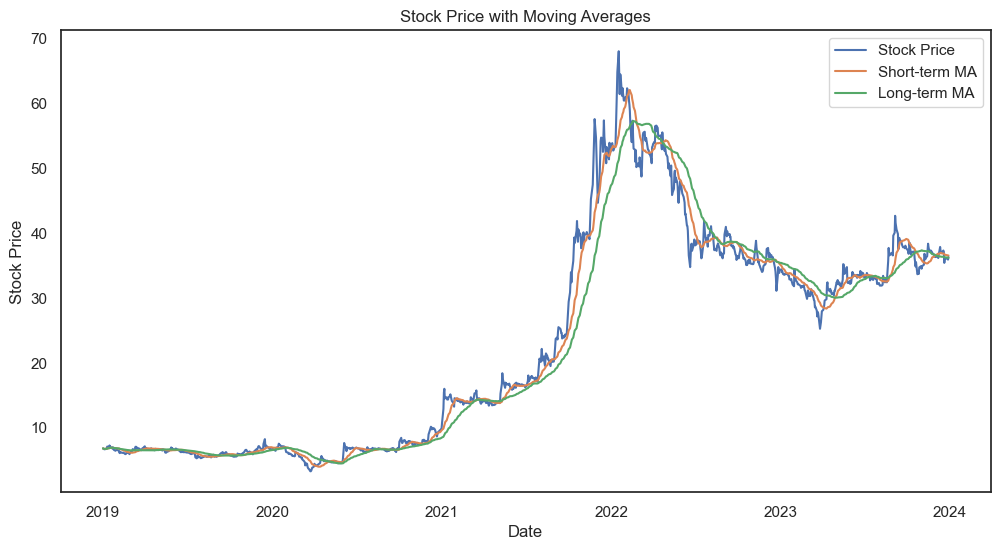

In [68]:
# Function to fetch historical stock prices from Yahoo Finance
def get_stock_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data

# Function to calculate moving averages
def calculate_moving_averages(data, short_window, long_window):
    data['Short_MA'] = data['Close'].rolling(window=short_window, min_periods=1).mean()
    data['Long_MA'] = data['Close'].rolling(window=long_window, min_periods=1).mean()
    return data

# Function to plot stock prices and moving averages
def plot_stock_data(data):
    plt.figure(figsize=(12, 6))
    plt.plot(data['Close'], label='Stock Price')
    plt.plot(data['Short_MA'], label='Short-term MA')
    plt.plot(data['Long_MA'], label='Long-term MA')

    plt.title('Stock Price with Moving Averages')
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.show()

# Define the stock symbol and date range
ticker_symbol = 'TRIDENT.NS'
start_date = '2019-01-01'
end_date = '2023-12-30'

# Fetch historical stock prices
stock_data = get_stock_data(ticker_symbol, start_date, end_date)

# Define the short and long windows for moving averages
short_window = 20
long_window = 50

# Calculate moving averages
stock_data = calculate_moving_averages(stock_data, short_window, long_window)

# Plot the stock prices and moving averages
plot_stock_data(stock_data)

### WELSPUNIND

[*********************100%%**********************]  1 of 1 completed


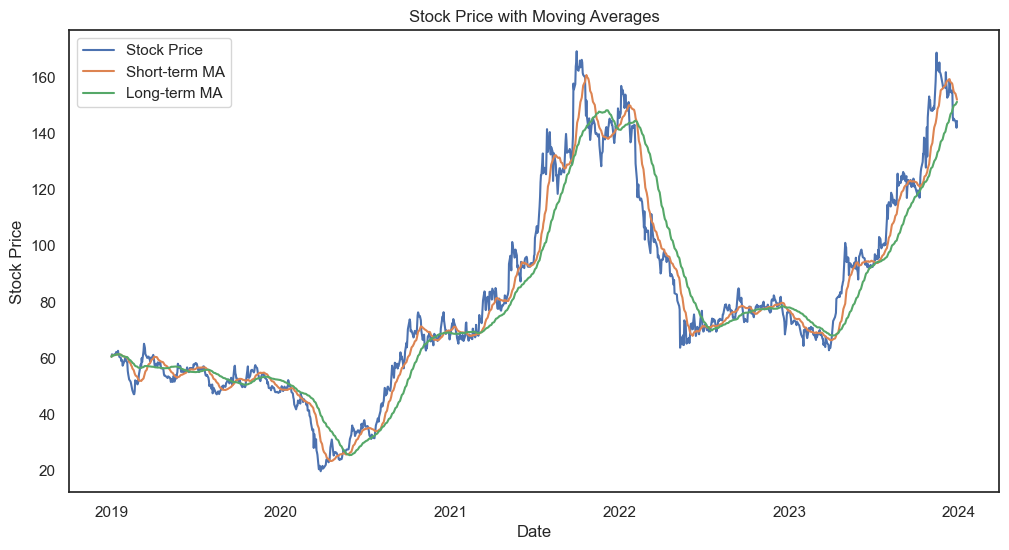

In [69]:
# Function to fetch historical stock prices from Yahoo Finance
def get_stock_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data

# Function to calculate moving averages
def calculate_moving_averages(data, short_window, long_window):
    data['Short_MA'] = data['Close'].rolling(window=short_window, min_periods=1).mean()
    data['Long_MA'] = data['Close'].rolling(window=long_window, min_periods=1).mean()
    return data

# Function to plot stock prices and moving averages
def plot_stock_data(data):
    plt.figure(figsize=(12, 6))
    plt.plot(data['Close'], label='Stock Price')
    plt.plot(data['Short_MA'], label='Short-term MA')
    plt.plot(data['Long_MA'], label='Long-term MA')

    plt.title('Stock Price with Moving Averages')
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.show()

# Define the stock symbol and date range
ticker_symbol = 'WELSPUNIND.NS'
start_date = '2019-01-01'
end_date = '2023-12-30'

# Fetch historical stock prices
stock_data = get_stock_data(ticker_symbol, start_date, end_date)

# Define the short and long windows for moving averages
short_window = 20
long_window = 50

# Calculate moving averages
stock_data = calculate_moving_averages(stock_data, short_window, long_window)

# Plot the stock prices and moving averages
plot_stock_data(stock_data)

[*********************100%%**********************]  5 of 5 completed
[*********************100%%**********************]  2 of 2 completed


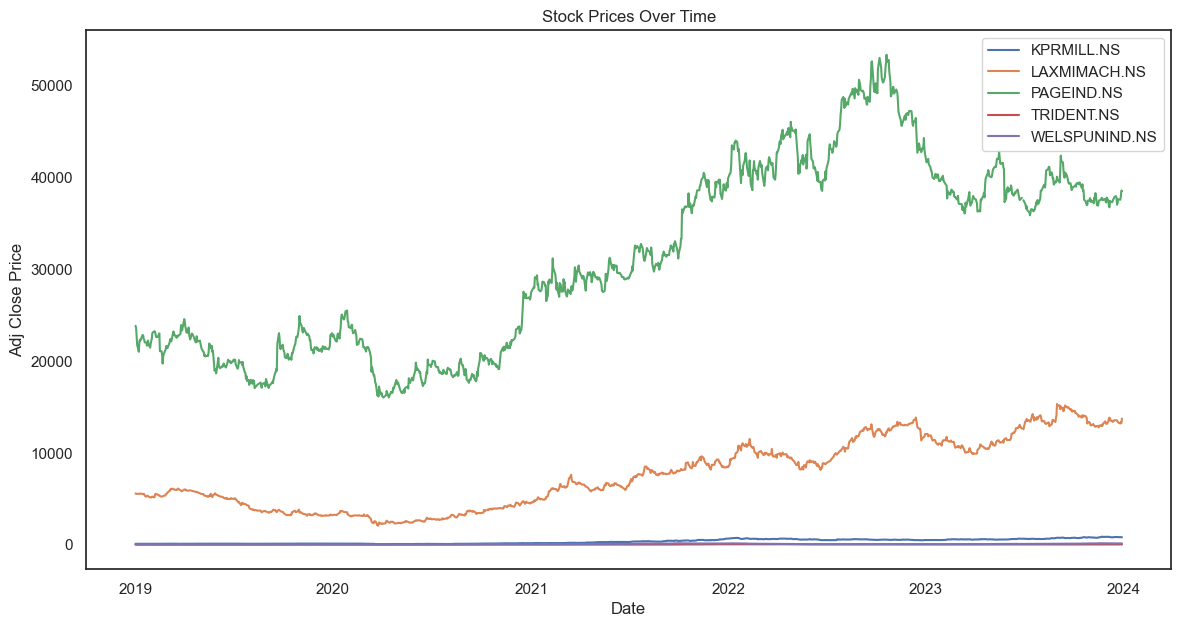

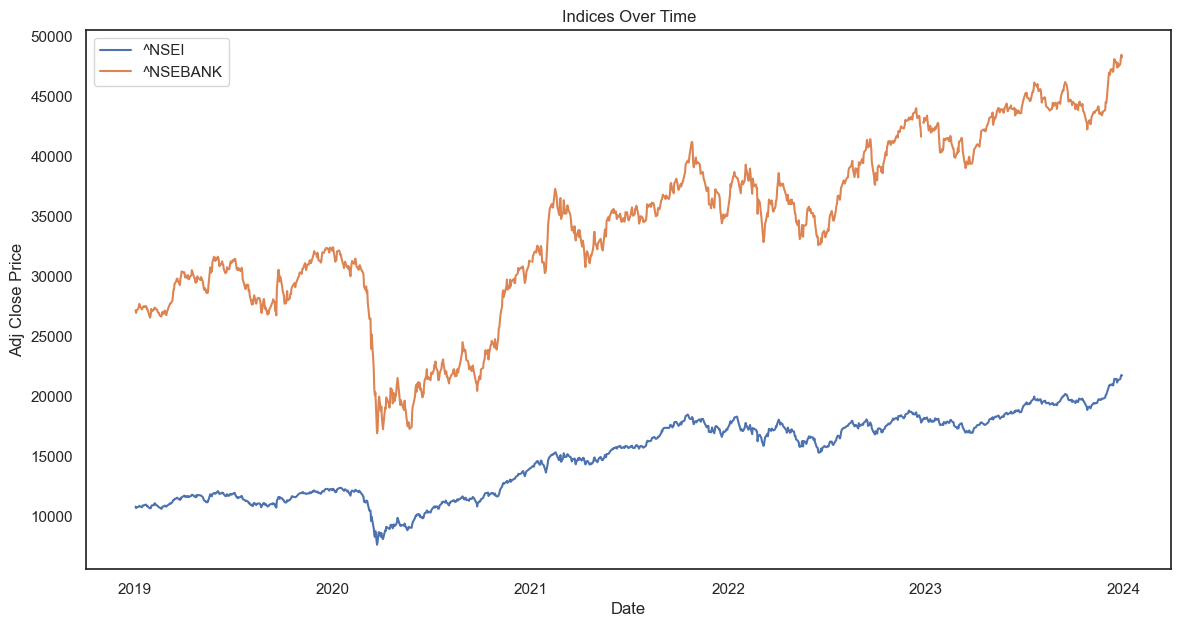

In [70]:
# Function to fetch historical stock and index data from Yahoo Finance
def get_data(tickers, start_date, end_date):
    data = yf.download(tickers, start=start_date, end=end_date)
    return data['Adj Close']

# Define the stock symbols, index symbols, and date range
stock_symbols = ['KPRMILL.NS', 'LAXMIMACH.NS', 'PAGEIND.NS', 'TRIDENT.NS', 'WELSPUNIND.NS']  # Example stock symbols
index_symbols = ['^NSEI', '^NSEBANK']  # Example index symbols
start_date = '2019-01-01'
end_date = '2023-12-30'

# Fetch historical stock and index data
stock_data = get_data(stock_symbols, start_date, end_date)
index_data = get_data(index_symbols, start_date, end_date)

# Plotting the stock prices
plt.figure(figsize=(14, 7))
for stock_symbol in stock_symbols:
    plt.plot(stock_data[stock_symbol], label=stock_symbol)

plt.title('Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Adj Close Price')
plt.legend()
plt.show()

# Plotting the indices
plt.figure(figsize=(14, 7))
for index_symbol in index_symbols:
    plt.plot(index_data[index_symbol], label=index_symbol)

plt.title('Indices Over Time')
plt.xlabel('Date')
plt.ylabel('Adj Close Price')
plt.legend()
plt.show()


## Calculate and analyse the volatility of each stock and index.

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  2 of 2 completed


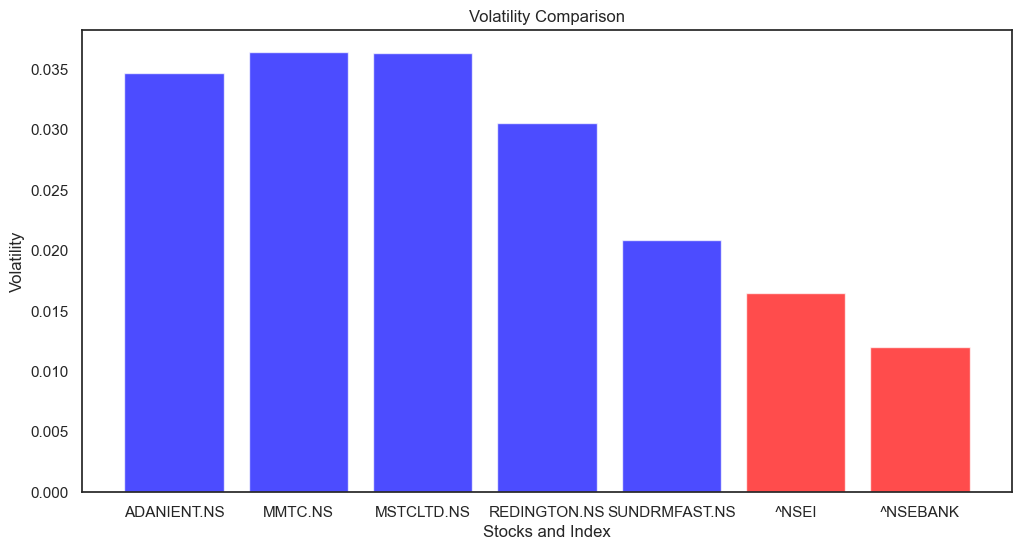

Stock Volatilities:
ADANIENT.NS      0.034709
MMTC.NS          0.036384
MSTCLTD.NS       0.036283
REDINGTON.NS     0.030549
SUNDRMFAST.NS    0.020839
dtype: float64

Index Volatility:
^NSEBANK    0.016501
^NSEI       0.012040
dtype: float64


In [71]:
# Function to fetch historical stock prices from Yahoo Finance
def get_stock_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data['Adj Close']

# Function to calculate volatility
def calculate_volatility(returns):
    return returns.std()

# Define the stock tickers and index
stock_tickers = ['ADANIENT.NS','MMTC.NS','MSTCLTD.NS','REDINGTON.NS','SUNDRMFAST.NS']
index_ticker = '^NSEI','^NSEBANK'  # S&P 500 as an example

# Define the date range for historical data
start_date = '2019-01-01'
end_date = '2023-12-30'

# Fetch stock data for each stock and index
stock_data = pd.DataFrame({ticker: get_stock_data(ticker, start_date, end_date) for ticker in stock_tickers})
index_data = get_stock_data(index_ticker, start_date, end_date)

# Calculate daily returns for each stock and index
stock_returns = stock_data.pct_change().dropna()
index_returns = index_data.pct_change().dropna()

# Calculate volatility for each stock and index
stock_volatility = stock_returns.apply(calculate_volatility)
index_volatility = calculate_volatility(index_returns)

# Plotting the volatility
plt.figure(figsize=(12, 6))

for ticker in stock_tickers:
    plt.bar(ticker, stock_volatility[ticker], color='blue', alpha=0.7)

plt.bar(index_ticker, index_volatility, color='red', alpha=0.7)

plt.title('Volatility Comparison')
plt.xlabel('Stocks and Index')
plt.ylabel('Volatility')
plt.show()

# Display the calculated volatilities
print("Stock Volatilities:")
print(stock_volatility)

print("\nIndex Volatility:")
print(index_volatility)


## Calculate and analyse key financial ratios for each company.

In [72]:
import yfinance as yf
import pandas as pd

# List of stock tickers for the companies you want to analyze
tickers = ['ADANIENT.NS', 'MMTC.NS', 'MSTCLTD.NS','REDINGTON.NS','SUNDRMFAST.NS']

# Function to fetch financial data from Yahoo Finance
def get_financial_data(tickers, start_date, end_date):
    data = yf.download(tickers, start=start_date, end=end_date)
    return data['Adj Close']

# Function to calculate financial ratios
def calculate_ratios(data):
    ratios = pd.DataFrame()

    # Calculate key financial ratios
    ratios['Return on Equity (ROE)'] = data.pct_change().mean() * 252  # Assuming 252 trading days in a year
    ratios['Return on Assets (ROA)'] = data.pct_change().mean() * 252 / data.mean()
    ratios['Debt to Equity Ratio'] = data.diff().sum() / data.diff(-1).sum()

    return ratios

# Set the start and end dates for financial data
start_date = '2019-01-01'
end_date = '2023-12-30'

# Fetch financial data
financial_data = get_financial_data(tickers, start_date, end_date)

# Calculate ratios
financial_ratios = calculate_ratios(financial_data)

# Display the calculated ratios
print("Financial Ratios:")
print(financial_ratios)


[*********************100%%**********************]  5 of 5 completed
Financial Ratios:
               Return on Equity (ROE)  Return on Assets (ROA)  \
ADANIENT.NS                  0.746000                0.000556   
MMTC.NS                      0.296641                0.008861   
MSTCLTD.NS                   0.575679                0.002512   
REDINGTON.NS                 0.443159                0.004420   
SUNDRMFAST.NS                0.230883                0.000319   

               Debt to Equity Ratio  
ADANIENT.NS                    -1.0  
MMTC.NS                        -1.0  
MSTCLTD.NS                     -1.0  
REDINGTON.NS                   -1.0  
SUNDRMFAST.NS                  -1.0  
